In [2]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

train_dataset = ds['train']

test_val_split = ds['test'].train_test_split(test_size=0.5, seed=42)
test_dataset = test_val_split['train']
val_dataset = test_val_split['test']

# Print the sizes of the splits
print("Train size:", len(train_dataset))     
print("Test size:", len(test_dataset))        
print("Validation size:", len(val_dataset)) 


Train size: 8103
Test size: 4000
Validation size: 4000


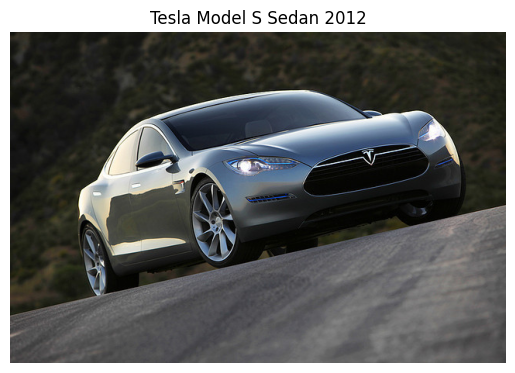

In [71]:
item = train_dataset[5]
img = item['image_path']           
car_name = item['car_name']       

# Display 
plt.imshow(img)
plt.axis('off')
plt.title(car_name)
plt.show()

In [79]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])